In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 3
#plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (8, 5)

In [2]:
s = ct.tf('s')

#Dinâmica do sistema:
G = (1.2/((s+1)**3))

#Controlador:
C = (((1.1*(s**2)) + (2.05*s) + 1)/((0.1*(s**2)) + (2*s)))

#Dinâmica de realimentação:
H = (0.5/(s+0.5))

In [3]:
#Malha fechada:
sys = ct.feedback((G*C), H, -1)

sys

TransferFunction(array([1.32, 3.12, 2.43, 0.6 ]), array([0.1 , 2.35, 7.45, 9.25, 5.71, 2.23, 0.6 ]))

In [4]:
ct.poles(sys)

array([-19.99910268+0.j        ,  -1.42450739+0.j        ,
        -0.93352573+0.17864276j,  -0.93352573-0.17864276j,
        -0.10466923+0.47135699j,  -0.10466923-0.47135699j])

In [5]:
ct.zeros(sys)

array([-0.93181818+0.20200442j, -0.93181818-0.20200442j,
       -0.5       +0.j        ])

(array([[-1.99991027e+01+0.00000000e+00j, -1.42450739e+00+0.00000000e+00j,
         -9.33525730e-01-1.78642761e-01j, -9.33525730e-01+1.78642761e-01j,
         -1.04669233e-01-4.71356992e-01j, -1.04669233e-01+4.71356992e-01j],
        [-2.00329534e+01+0.00000000e+00j, -1.01510129e+00+0.00000000e+00j,
         -9.72870101e-01-1.65582563e-01j, -9.72870101e-01+1.65582563e-01j,
         -2.53102571e-01-7.30030997e-01j, -2.53102571e-01+7.30030997e-01j],
        [-2.00329534e+01+0.00000000e+00j, -1.01510129e+00+0.00000000e+00j,
         -9.72870101e-01-1.65582563e-01j, -9.72870101e-01+1.65582563e-01j,
         -2.53102571e-01-7.30030997e-01j, -2.53102571e-01+7.30030997e-01j],
        [-2.00427772e+01+0.00000000e+00j, -9.07121926e-01+0.00000000e+00j,
         -9.82305852e-01-1.91982762e-01j, -9.82305852e-01+1.91982762e-01j,
         -2.92744570e-01-8.10346487e-01j, -2.92744570e-01+8.10346487e-01j],
        [-2.00427772e+01+0.00000000e+00j, -9.07121926e-01+0.00000000e+00j,
         -9.82305852e

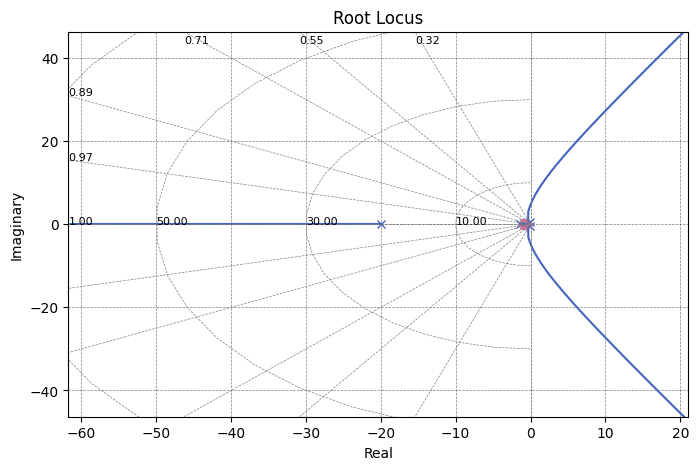

In [6]:
ct.root_locus(sys)

(array([0.98058068, 0.98040606, 0.98022993, 0.98005225, 0.97987304,
        0.97969226, 0.9795099 , 0.97932597, 0.97914043, 0.97895328,
        0.97876451, 0.9785741 , 0.97838203, 0.97818831, 0.9779929 ,
        0.97779581, 0.97759701, 0.97739649, 0.97719424, 0.97699024,
        0.97678449, 0.97657696, 0.97636764, 0.97615652, 0.97594358,
        0.97572881, 0.9755122 , 0.97529372, 0.97507338, 0.97485114,
        0.97462699, 0.97440093, 0.97417294, 0.97394299, 0.97371108,
        0.97347719, 0.9732413 , 0.9730034 , 0.97276348, 0.97252151,
        0.97227749, 0.97203139, 0.9717832 , 0.9715329 , 0.97128049,
        0.97102593, 0.97076922, 0.97051034, 0.97024927, 0.96998599,
        0.9697205 , 0.96945276, 0.96918277, 0.96891051, 0.96863596,
        0.96835911, 0.96807992, 0.9677984 , 0.96751452, 0.96722827,
        0.96693961, 0.96664855, 0.96635506, 0.96605912, 0.96576072,
        0.96545983, 0.96515644, 0.96485053, 0.96454208, 0.96423107,
        0.96391749, 0.96360131, 0.96328252, 0.96

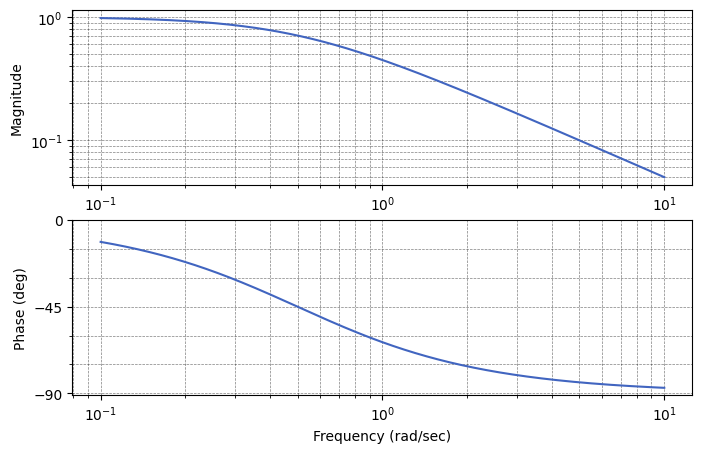

In [7]:
ct.bode(H)

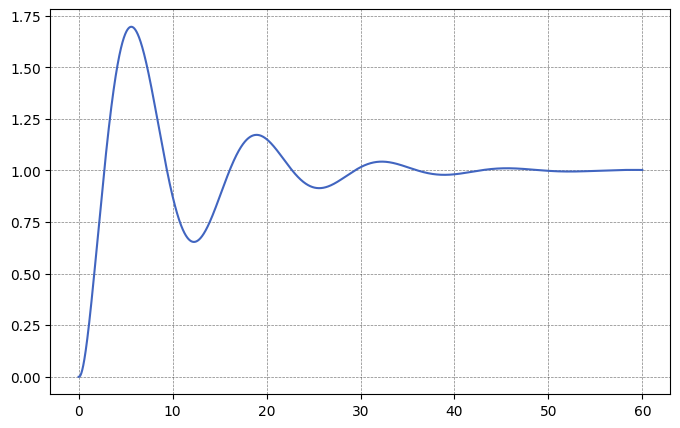

In [8]:
t = np.arange(0, 60, 1e-2)

t, y = ct.step_response(sys, t)

plt.figure(1)
plt.plot(t, y)
plt.show()